In [19]:
import pandas as pd

In [20]:
data = pd.read_parquet("data.parquet")
random_data = data.sample(n=10)
with pd.ExcelWriter("random_data.xlsx", engine='xlsxwriter') as writer:
    # Write the DataFrame to the specified Excel file
    random_data.to_excel(writer, sheet_name='Sheet1', index=False)

    # Access the XlsxWriter workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']

    # Define a format for text wrapping
    wrap_format = workbook.add_format({'text_wrap': True})

    # Set the column width and apply the wrap format to each column
    worksheet.set_column('A:A', 40, wrap_format)  # Adjust width and wrap for Column1
    worksheet.set_column('B:B', 40, wrap_format)  
    worksheet.set_column('C:C', 40, wrap_format)
print(random_data)

                                                   output  \
95926   You can use the `round()` function to round th...   
221342  Returns a set of all the topics that are inter...   
112883  ```python\nsum = 0\nfor i in range(0, 10):\n  ...   
115118  Sure! Here's a code snippet that uses the `req...   
278771  Adds a base_template attribute to the context ...   
35288   #!/usr/bin/env python\n\nimport datetime\n\nde...   
267625  def _add(a, b, relicAdd):\n    """\n    Adds t...   
261808  def includeme(config):\n    """\n    Include `...   
231544  Called by the endpoint when a new media transp...   
7768    Here's a code snippet in Python that allows th...   

                                              instruction  \
95926   Inside a Python program, how would you convert...   
221342  Explain what the following Python 3 code does\...   
112883  Alter the code to include a break statement in...   
115118  Using the "requests" library, write a code to ...   
278771  Explain what th

Preprocessing:
After an initial look through at the 10 random data points, it appears to be quite all over the place in terms of organization. Some of the data is misorganized with no system prompt, not in python, or doesn't even generate code in the first place. However, I looked at the first 1500 data points in the dataset, and they seemed to not have these problems, and follow a consistent format. As such, I will cut down the data set down to the first 1500 datapoints, and perform a data analysis on those.

In [35]:
data_subset = data.head(1500)
data_subset.to_excel("data_subset.xlsx")
random_preprocessed_data = data_subset.sample(n=10)
with pd.ExcelWriter("random_preprocessed_data.xlsx", engine='xlsxwriter') as writer:
    # Write the DataFrame to the specified Excel file
    random_preprocessed_data.to_excel(writer, sheet_name='Sheet1', index=False)

    # Access the XlsxWriter workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']

    # Define a format for text wrapping
    wrap_format = workbook.add_format({'text_wrap': True})

    # Set the column width and apply the wrap format to each column
    worksheet.set_column('A:A', 40, wrap_format)  # Adjust width and wrap for Column1
    worksheet.set_column('B:B', 40, wrap_format)  
    worksheet.set_column('C:C', 40, wrap_format)
print(random_preprocessed_data)

                                                 output  \
1013  To code a function that checks whether a given...   
238   Here is a possible solution in Python:\n\n```p...   
647   Here's the corrected and improved implementati...   
1256  ```python\n# Step 1: Create a 2D array\narray ...   
1183  1. Mutability:\n- Lists are mutable, meaning t...   
515   Here is a recursive solution in Python:\n\n```...   
864   To compute the median of an array of n integer...   
1497  Here's one possible implementation of the Quic...   
772   Unfortunately, I don't have access to a databa...   
1211  Here is an example of a Python script that mee...   

                                            instruction  \
1013  How would you code a function that takes a str...   
238   Write a program that takes a string as input a...   
647   Implement a function to sort an array in desce...   
1256  Write a Python program that prints the content...   
1183  List five differences between a list and a tup...

In [23]:
value_counts_system = data_subset['system'].value_counts()
num_unique_system = len(value_counts_system)

print(value_counts_system)
print(f'Number of unique system prompts: {num_unique_system}')

system
As a Python code composer, you craft elegant and concise scripts.                       230
You are a Python code generator, capable of creating scripts from specifications.       225
As a Python code translator, you convert algorithms and pseudocode into Python.         224
You are a Python code analyst, evaluating scripts for potential improvements.           219
You are a Python code architect, reviewing and designing scalable and efficient code    205
As a Python code analyst, you investigate and solve complex coding mysteries            200
As a python code expert, you are capable of creating scripts from specifications.       197
Name: count, dtype: int64
Number of unique system prompts: 7


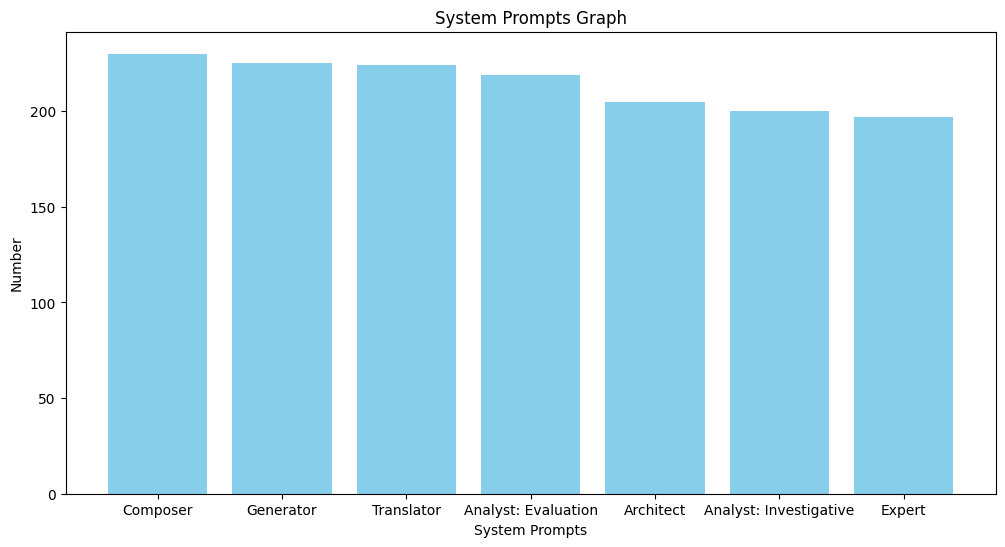

In [30]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Composer', 'Generator', 'Translator', 'Analyst: Evaluation', 'Architect', 'Analyst: Investigative', 'Expert']
values = [230, 225, 224, 219, 205, 200, 197]

plt.figure(figsize=(12, 6))
# Create the bar graph
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('System Prompts Graph')
plt.xlabel('System Prompts')
plt.ylabel('Number')

# Show the plot
plt.show()

In this data subset, there appears to be about 7 different coding roles. Composer, generator, translator, architect, expert, and two different analyst roles. One which focuses on evaluation, and the other which focuses on investigating complex problems.

system
You are a Python code generator, capable of creating scripts from specifications.       3
As a Python code translator, you convert algorithms and pseudocode into Python.         3
You are a Python code architect, reviewing and designing scalable and efficient code    1
You are a Python code analyst, evaluating scripts for potential improvements.           1
As a Python code composer, you craft elegant and concise scripts.                       1
As a Python code analyst, you investigate and solve complex coding mysteries            1
Name: count, dtype: int64


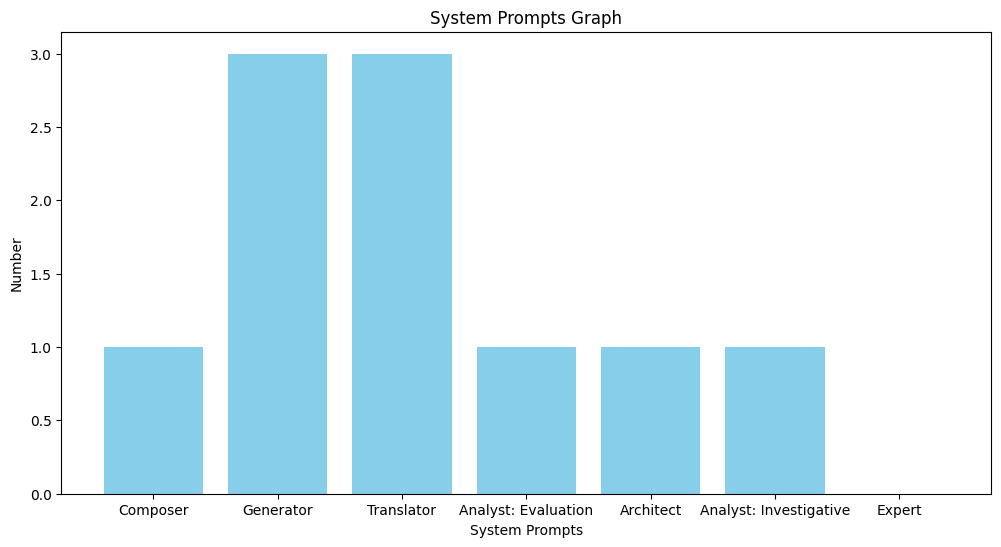

In [33]:
counts_system = random_preprocessed_data['system'].value_counts()

print(counts_system)

categories = ['Composer', 'Generator', 'Translator', 'Analyst: Evaluation', 'Architect', 'Analyst: Investigative', 'Expert']
values = [1, 3, 3, 1, 1, 1, 0]

plt.figure(figsize=(12, 6))
# Create the bar graph
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('System Prompts Graph')
plt.xlabel('System Prompts')
plt.ylabel('Number')

# Show the plot
plt.show()

In our subset of data, we appear to have the above distribution of system prompt types

In [34]:
def average_word_length(series):
    # Split each string in the series into words
    words = series.str.split()
    
    # Calculate total number of words

    total_words = words.apply(len)
    
    # Calculate average number of words
    average_length = total_words.sum() / 10; #Ten rows of data
    return average_length

# Loop through each column and print the average word length for text columns
for column in random_preprocessed_data.select_dtypes(include=['object']).columns:  # Select only object type columns (text)
    avg_length = average_word_length(random_preprocessed_data[column])
    print(f'The average word length in column "{column}" is: {avg_length:.2f}')

The average word length in column "output" is: 196.50
The average word length in column "instruction" is: 148.10
The average word length in column "system" is: 11.90


Data Analysis: See random_preprocessed_data.xlsx

Inputs: The inputs seem quite complex, often having many requirements for the code. On average, the word length of the instructions is 148.90 words long. 

There were 8 inputs for which the code was asked to generate code that met some specific requirements. One of these provided a "dataset" which was not in provided in the prompt.

 There were another two inputs that asked to refactor some code (one of which didn't provide said code). 

Output. The outputs are also quite complex. On average, the word length of the outputs all togeter is 196.50 words.

The Outputs:
Almost all outputs have code and explanations about how said code works, with the exception of one which only has code. However this outlier was asking for the algorithm to modify code (which was not provided). As such we would likely get rid of this outlier

In addition 

-4 outputs reference run time, three even providing specific Big-Oh runtimes. However all of these inputs had mentioned runtime. 

-4 outputs provide example usages, even though the prompt did not ask for them.



CONCLUSION

Potential Problems:

1. There are multiple data points which ask for analysis of python code or a data set which are not provided, we must make sure to look through our dataset and get rid of any such examples. We may even want to get rid of all refactoring prompts all together
2. Inputs are quite complex. They have multiple requirements for the code. This may cause our LLM problems with simple requests as the prompts vary quite a bit, and are all complex. 
3. All of the code appears to be generated by ChatGPT, which may provide incorrect code that doesn't work or is syntactically wrong.

Pros:

1. Data is quite well organized
3. Data is all ChatGPT generations of code, so our code generations may have similarly readable outputs, and improved explanations of code.
4. Inputs are complex, which will hopefully allow the LLM to deal with complex inputs.

Overall I think this dataset definitely needs extra preprocessing, even if we take only the first 1500 datapoints. In addition, given the fact the dataset uses ChatGPT code, we open ourselves up to potential errors. That being said, I still believe that since it is an organized data set that provides explanations, we should move forward with it.